In [9]:
import numpy as np
import pandas as pd
import logging
import os
import argparse
import os

import numpy as np
import pandas as pd
import sys
log = lambda msg: logging.info(msg)

root_dir = os.path.abspath(os.path.join(os.path.dirname('__file__'), '../..'))
sys.path.append(root_dir)


# Load data

In [10]:
input_dir = "C:\\dev\\play\\brainwave-data"


In [11]:
import stitch_pipeline_results
from importlib import reload
reload(stitch_pipeline_results)

df_orig = stitch_pipeline_results.stitch_all_days_optimised(input_dir)
df = df_orig.copy()

  0%|          | 0/156 [00:00<?, ?it/s]

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [4]:
from sleep_events import load_days_data

day_data = load_days_data(True)

# Abs band powers vs energy

In [5]:
feat = 'night:yasaExtended:N3:sdeltaabs:mean'
epoch_feat = 'Main_eeg_sdeltaabs'
stage = "N3"

In [6]:
df_for_stage = df[df['Stage'] == stage]
grouped = df_for_stage.groupby('dayAndNightOf').agg(
    dayAndNightOf=('dayAndNightOf', 'first'),
    FeatMean=(epoch_feat, 'mean'),
    FeatMedian=(epoch_feat, 'median')
)
grouped

,dayAndNightOf,FeatMean,FeatMedian
dayAndNightOf,,,
2024-07-11,2024-07-11,0.413067,0.381492
2024-07-12,2024-07-12,0.367252,0.363640
2024-07-15,2024-07-15,0.401903,0.368266
2024-07-16,2024-07-16,0.445665,0.384818
2024-07-17,2024-07-17,0.451041,0.435882
...,...,...,...
2024-12-29,2024-12-29,0.567290,0.529494
2024-12-30,2024-12-30,0.450173,0.396367
2024-12-31,2024-12-31,0.462444,0.422646


<Axes: xlabel='dayAndNightOf'>

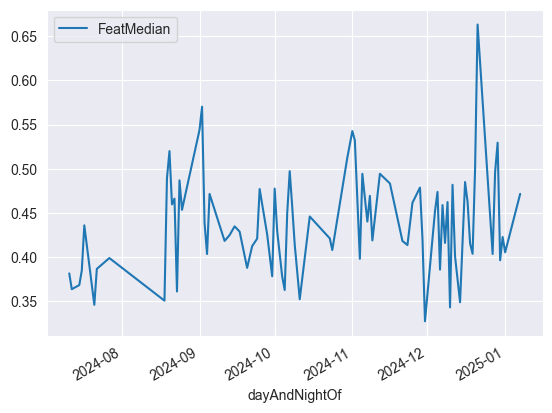

In [10]:
grouped.plot(x='dayAndNightOf', y='FeatMedian')

In [8]:
great_nights = grouped[(grouped['dayAndNightOf'] == '2024-09-30') | (grouped['dayAndNightOf'] == '2024-10-05')]
great_nights

,dayAndNightOf,FeatMean,FeatMedian
dayAndNightOf,,,
2024-09-30,2024-09-30,0.426836,0.378275
2024-10-05,2024-10-05,0.421044,0.362728


In [11]:
import convert

great_day = "C:\\dev\\play\\brainwave-data\\2024-09-30-21-27-49\\raw.fif"
# large = "C:\\dev\\play\\brainwave-data\\2024-12-19-21-18-48\\raw.fif"
raw_great, input_file_without_ext, mne_filtered = convert.load_mne_file(log, great_day)
# raw_large, _, mne_filtered_large = convert.load_mne_file(log, large)


Opening raw data file C:\dev\play\brainwave-data\2024-09-30-21-27-49\raw.fif...
Isotrak not found
    Range : 0 ... 8406233 =      0.000 ... 33624.932 secs
Ready.
Reading 0 ... 8406233  =      0.000 ... 33624.932 secs...


In [14]:
#df[(df['dayAndNightOf'] == '2024-07-11') & df['Stage'] == 'N2']['Main_eeg_fdeltaabs'].describe()
df_for_great_day = df[(df['dayAndNightOf'] == '2024-09-30')].reset_index()
df_for_great_day[df_for_great_day['Stage'] == stage][epoch_feat]
#df_for_small_day.loc[463, ['dayAndNightOf', 'Stage', 'Main_eeg_fdeltaabs']]

146    0.183291
147    0.128311
148    0.140132
149    0.214453
150    0.243355
         ...   
663    0.322842
664    0.183772
665    0.431467
666    0.376906
667    0.751013
Name: Main_eeg_sdeltaabs, Length: 173, dtype: float64

In [373]:
    #df[(df['dayAndNightOf'] == '2024-07-11') & df['Stage'] == 'N2']['Main_eeg_fdeltaabs'].describe()
df_for_large_day = df[(df['dayAndNightOf'] == '2024-09-01')].reset_index()
df_for_large_day[df_for_large_day['Stage'] ==    'N2'][epoch_feat]
# df_for_large_day.loc[463, ['dayAndNightOf', 'Stage', 'Main_eeg_fdeltaabs']]

218     0.007510
225     0.007061
226     0.007330
228     0.006939
229     0.006841
          ...   
990     0.003107
1002    0.004837
1007    0.003561
1008    0.003942
1009    0.003387
Name: Main_eeg_betaabs, Length: 306, dtype: float64

In [374]:
df_for_large_day[df_for_large_day['Stage'] == 'N2'][epoch_feat].describe()

count    306.000000
mean       0.004313
std        0.010911
min        0.002109
25%        0.002723
50%        0.003300
75%        0.004457
max        0.193043
Name: Main_eeg_betaabs, dtype: float64

In [375]:
df_for_large_day[(df_for_large_day['Stage'] == 'N2') & (df_for_large_day.index != 490)][epoch_feat].describe()

count    305.000000
mean       0.003694
std        0.001375
min        0.002109
25%        0.002718
50%        0.003289
75%        0.004440
max        0.012235
Name: Main_eeg_betaabs, dtype: float64

In [385]:
epoch_index_small = 862
epoch_index_large = 181

sf = 250.
epoch_length = 30
samples_per_epoch = int(epoch_length * sf)

# data_small = mne_filtered_small.get_data(units='uV', picks='F8-M1')[0]
data_small = mne_filtered_small.get_data(units='uV')[0]
data_large = mne_filtered_large.get_data(units='uV')[0]

# data_small_raw = raw_small.get_data(units='uV', picks='F8-M1')[0]
data_small_raw = raw_small.get_data(units='uV')[0]
data_large_raw = raw_large.get_data(units='uV')[0]

epoch_data_small = data_small[epoch_index_small * samples_per_epoch : (epoch_index_small + 1) * samples_per_epoch]
epoch_data_large = data_large[epoch_index_large * samples_per_epoch : (epoch_index_large + 1) * samples_per_epoch]

epoch_data_small_raw = data_small_raw[epoch_index_small * samples_per_epoch : (epoch_index_small + 1) * samples_per_epoch]
epoch_data_large_raw = data_large_raw[epoch_index_large * samples_per_epoch : (epoch_index_large + 1) * samples_per_epoch]

epoch_data = epoch_data_small_raw

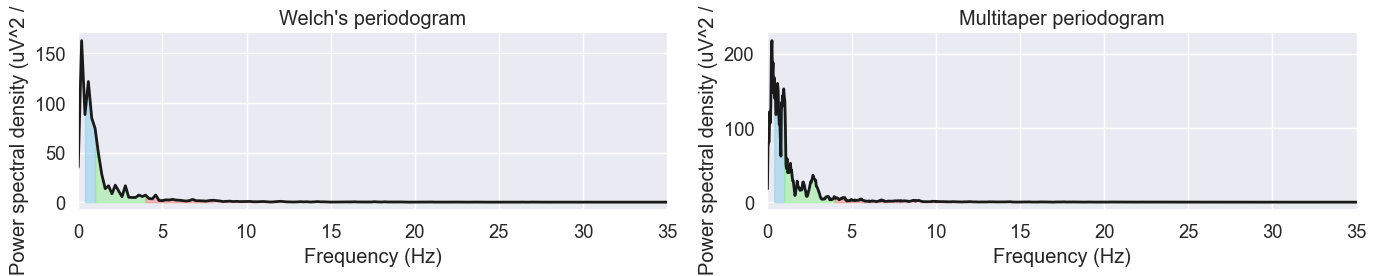

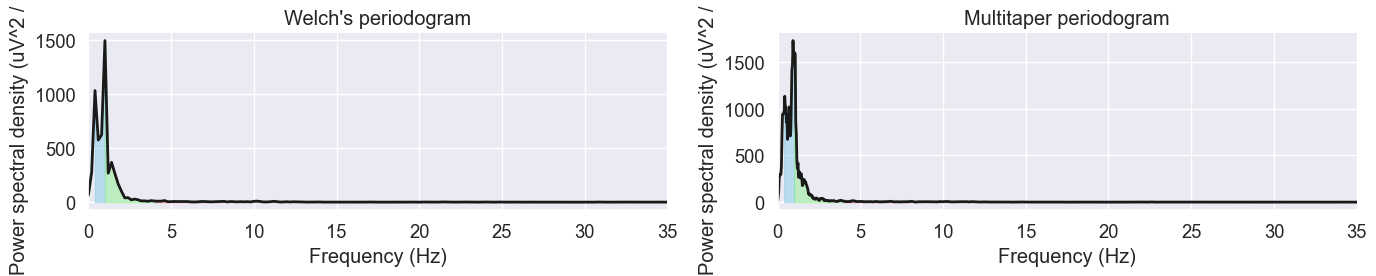

In [386]:
df_psd_welch_small, df_psd_multitaper_small, df_powers_small = calc_psd(epoch_data_small, sf)
df_psd_welch_large, df_psd_multitaper_large, df_powers_large = calc_psd(epoch_data_large, sf)
plot_power_spectral_density(df_psd_welch_small, df_psd_multitaper_small)
plot_power_spectral_density(df_psd_welch_large, df_psd_multitaper_large)

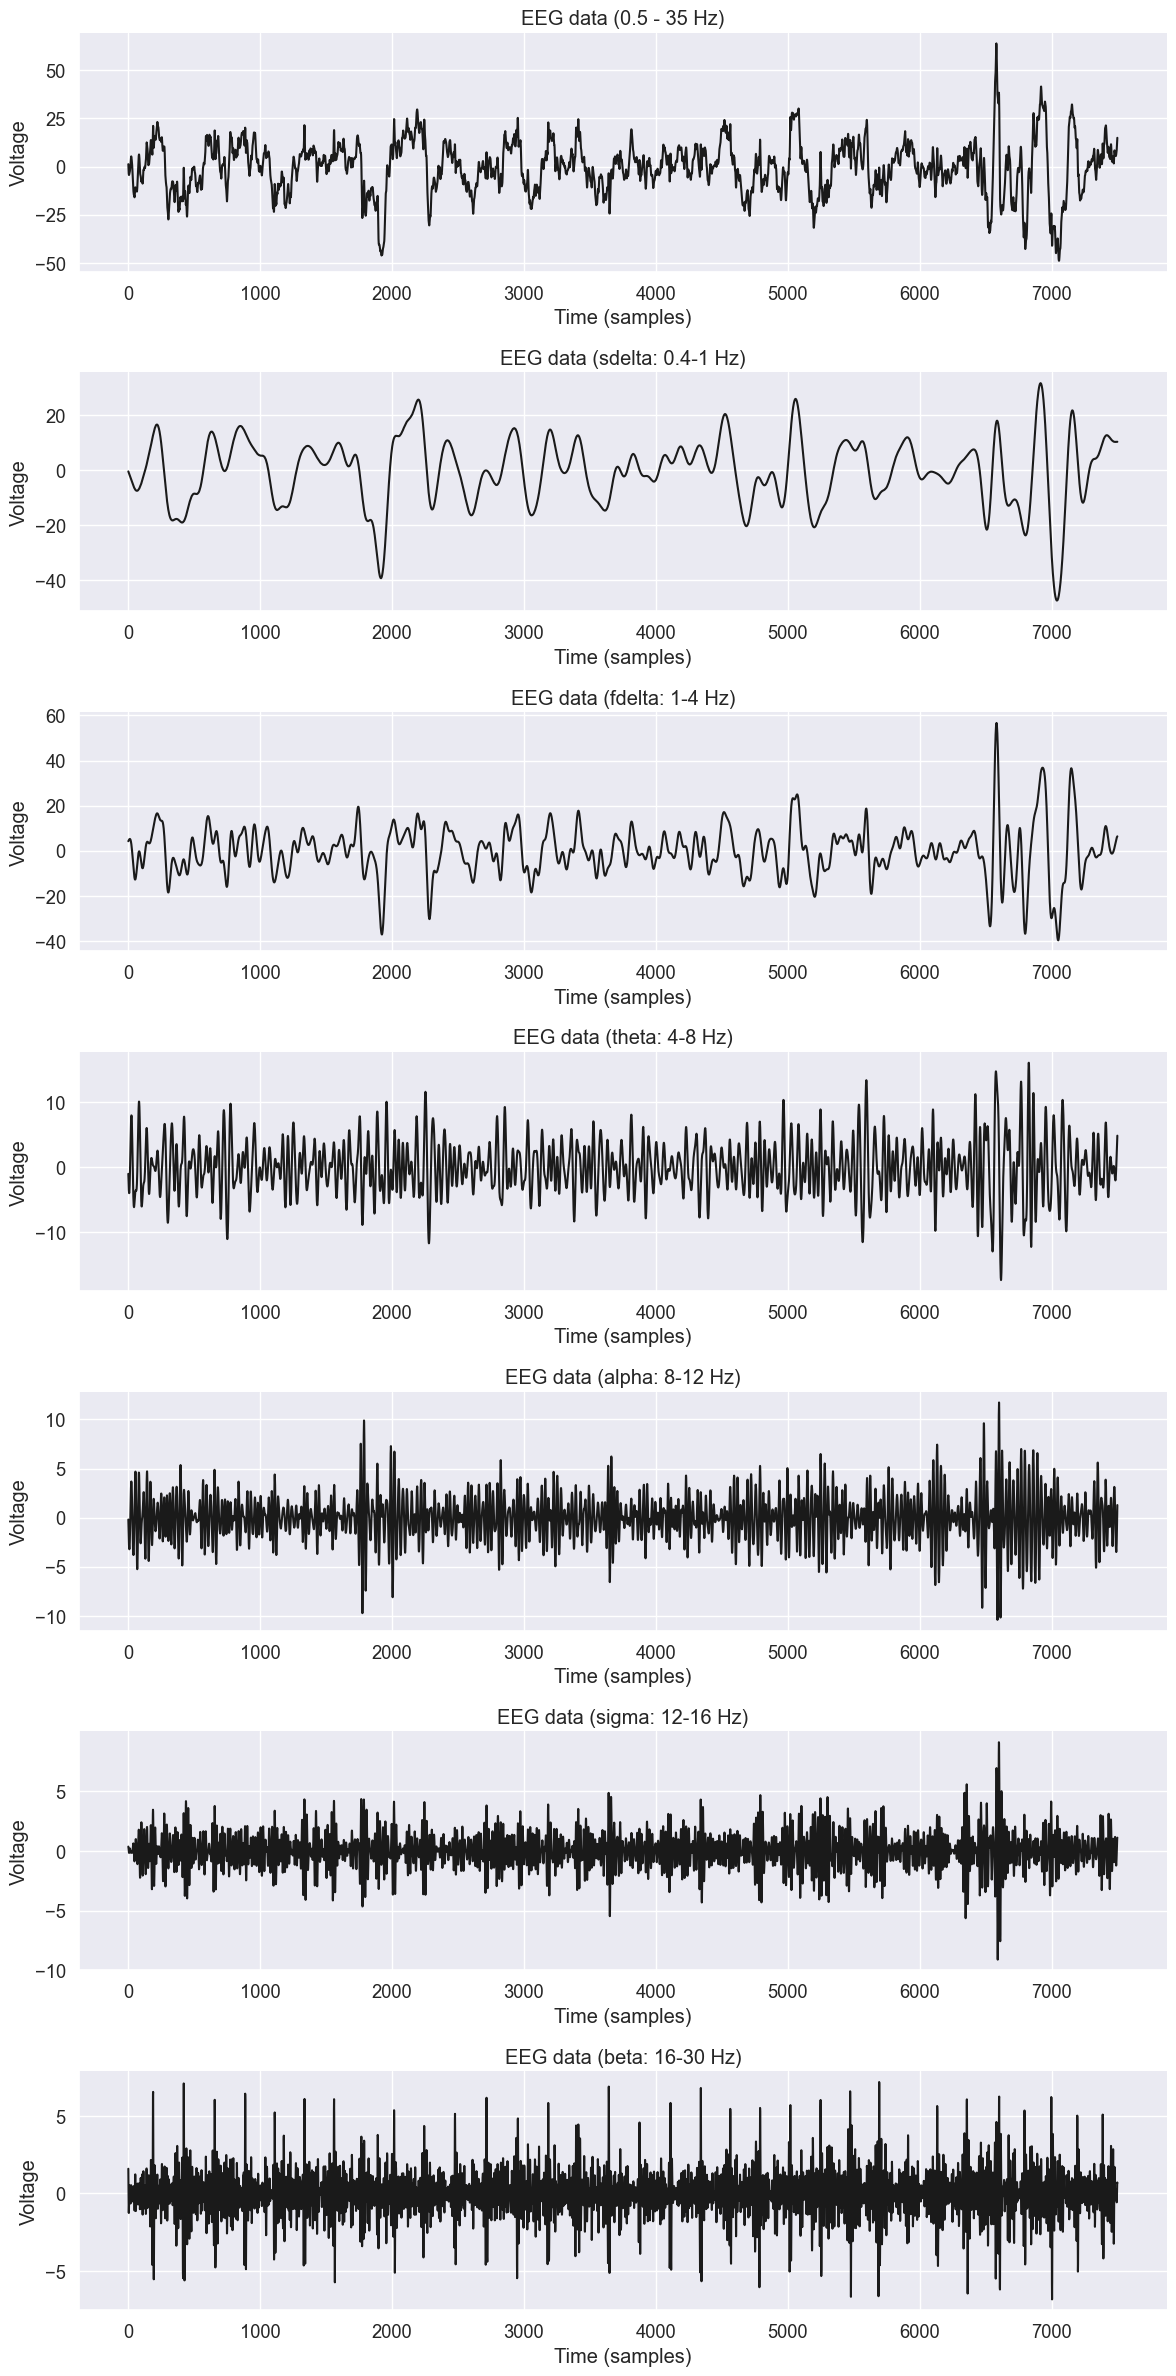

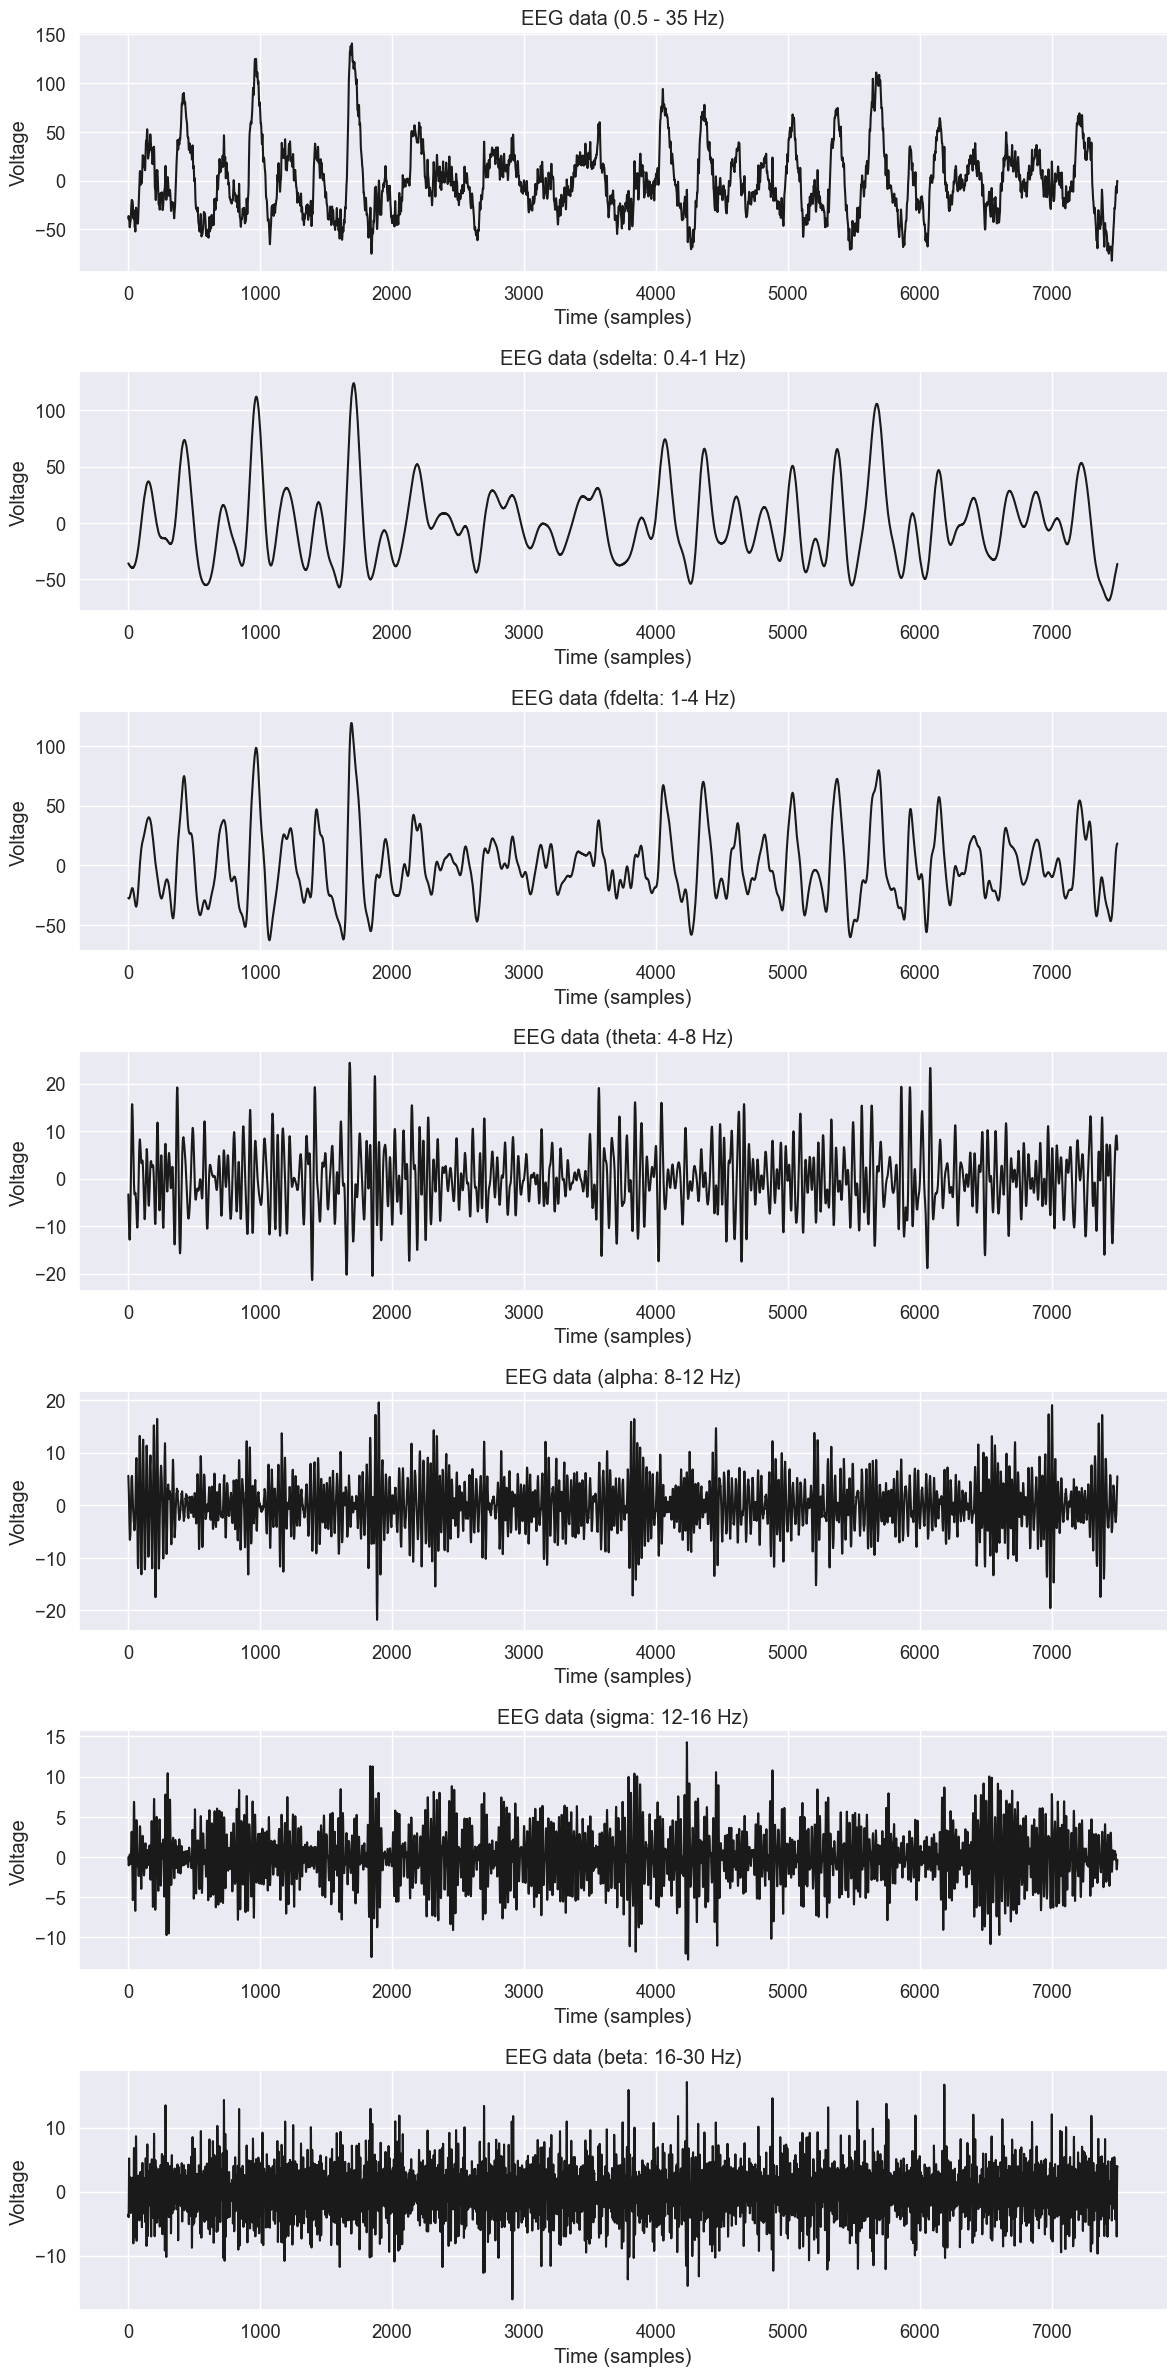

In [387]:
plot_band_power_breakdown(data_small_raw, epoch_index_small)
plot_band_power_breakdown(data_large_raw, epoch_index_large)


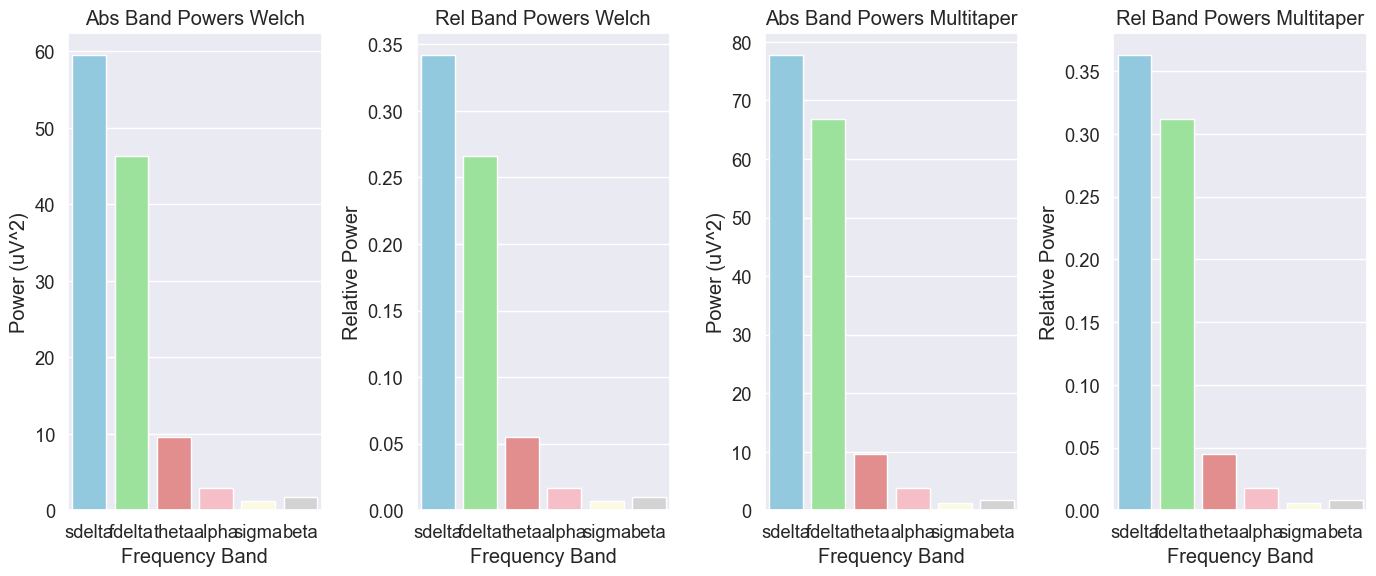

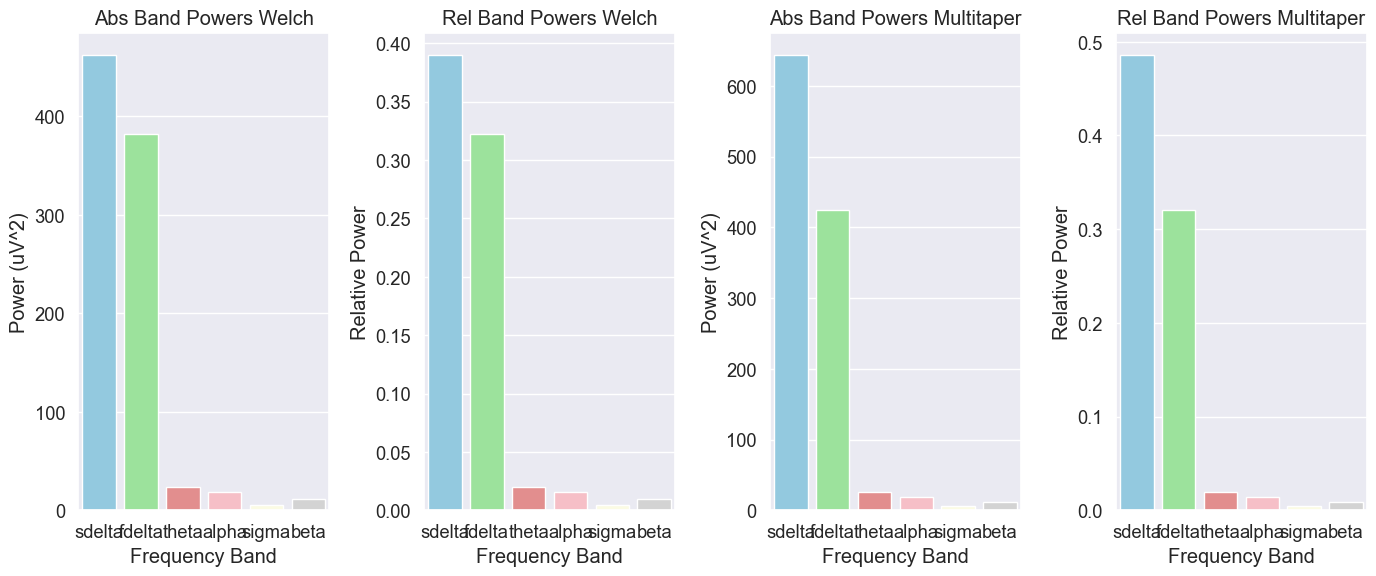

In [388]:
plot_band_powers(df_powers_small, colors)
plot_band_powers(df_powers_large, colors)

In [389]:
df_powers_large

,Band,Absolute Power Welch (uV^2),Relative Power Welch,Absolute Power Multitaper (uV^2),Relative Power Multitaper
0,sdelta,462.010776,0.389746,643.100250,0.485598
1,fdelta,381.676076,0.321977,425.084824,0.320977
2,theta,23.985523,0.020234,25.258091,0.019072
3,alpha,18.390302,0.015514,18.625680,0.014064
4,sigma,5.432493,0.004583,5.323669,0.004020
5,beta,11.627039,0.009808,11.539644,0.008713


# Comparing epochs on a specific night

In [12]:
import notebooks.Util.DayAndNightOfFinder
reload(notebooks.Util.DayAndNightOfFinder)
import convert
reload(convert)

full_dir, just_dir = notebooks.Util.DayAndNightOfFinder.day_and_night_of_dir(input_dir, '2025-01-31')
raw, input_file_without_ext, mne_filtered = convert.load_mne_file(log, full_dir + "/raw.fif")

Opening raw data file C:\dev\play\brainwave-data\2025-01-31-21-45-23/raw.fif...
Isotrak not found
    Range : 0 ... 9265482 =      0.000 ... 37061.928 secs
Ready.
Reading 0 ... 9265482  =      0.000 ... 37061.928 secs...


In [25]:
artifacts_df = pd.read_csv(full_dir + "/raw.artifacts.csv")

{0,
 1,
 2,
 3,
 9,
 17,
 19,
 21,
 25,
 26,
 30,
 31,
 36,
 48,
 53,
 54,
 55,
 56,
 58,
 59,
 65,
 73,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 135,
 136,
 145,
 147,
 148,
 149,
 150,
 152,
 153,
 154,
 155,
 156,
 158,
 159,
 160,
 161,
 173,
 174,
 206,
 209,
 210,
 219,
 226,
 248,
 249,
 279,
 280,
 320,
 390,
 391,
 392,
 393,
 394,
 397,
 398,
 407,
 415,
 416,
 423,
 424,
 434,
 452,
 453,
 454,
 496,
 538,
 566,
 567,
 597,
 598,
 601,
 603,
 604,
 605,
 606,
 623,
 630,
 635,
 673,
 687,
 703,
 710,
 715,
 729,
 795,
 797,
 798,
 799,
 815,
 816,
 818,
 819,
 820,
 821,
 822,
 824,
 825,
 868,
 885,
 898,
 899,
 904,
 906,
 912,
 914,
 915,
 917,
 928,
 930,
 939,
 952,
 957,
 959,
 969,
 979,
 997,
 1008,
 1013,
 1019,
 1040,
 1049,
 1056,
 1103,
 1138,
 1140,
 1146,
 1149,
 1175,
 1208,
 1211,
 1212,
 1213,
 1225,
 1234,
 1235}

Removing artifacts between 974254 and 975434 start_sample=975000, end_sample=982500


'Epoch(epoch_idx=130, start_sample=975000, end_sample=982500, has_artifacts=True, data_raw=(7500,), data_artifact_removed=(7500,), removed_samples=434)'

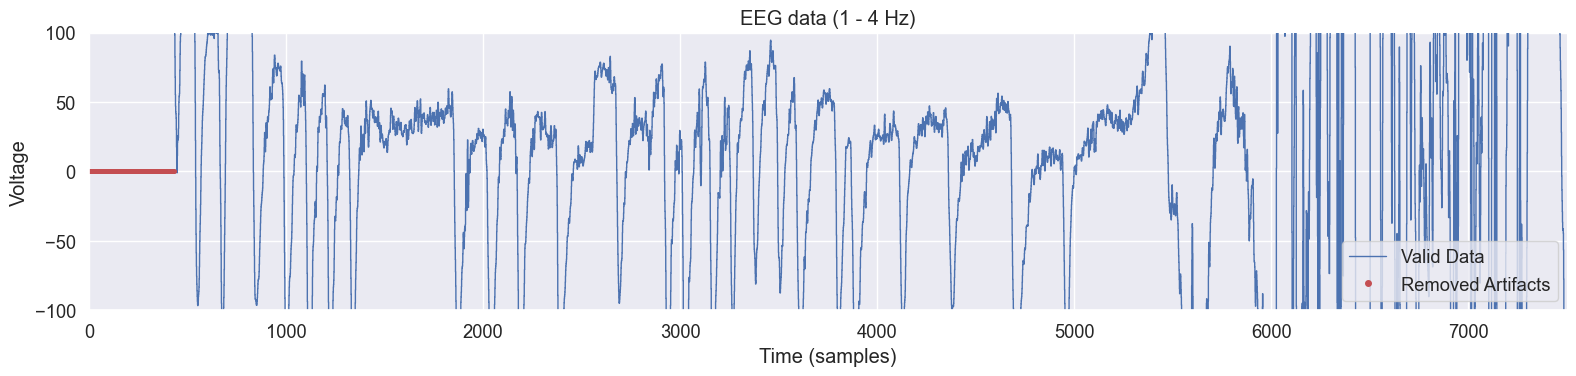

In [72]:
import notebooks.Util.DrawEpochs
reload(notebooks.Util.DrawEpochs)
import matplotlib.pyplot as plt
import seaborn as sns
from mne.filter import filter_data
import notebooks.Util.BandPowers
reload(notebooks.Util.BandPowers)
from notebooks.Util.DrawEpochs import Epoch

def plot_eeg_with_isolated_frequencies(epoch: Epoch, freq_low, freq_high, sf=250, samples_per_epoch=7500, max_display_amplitude=None):
    fig, ax = plt.subplots(1, 1, figsize=(16, 4))
    if max_display_amplitude is not None:
        plt.ylim(-max_display_amplitude, max_display_amplitude)

    # Get the data with NaN values
    data = epoch.data_artifact_removed
    
    # Create x values (sample indices)
    x = np.arange(len(data))
    
    # Plot non-NaN values in blue
    mask_valid = ~np.isnan(data)
    ax.plot(x[mask_valid], data[mask_valid], lw=1, color='b', drawstyle='steps')
    
    # Plot NaN values as 0 in red
    mask_nan = np.isnan(data)
    if np.any(mask_nan):  # Only plot if there are any NaN values
        ax.plot(x[mask_nan], np.zeros(np.sum(mask_nan)), 'o', color='r', markersize=2)
    
    ax.set_xlabel('Time (samples)')
    ax.set_ylabel('Voltage')
    ax.set_title(f'EEG data ({freq_low} - {freq_high} Hz)')
    
    # Set x-axis limits to include the full range
    ax.set_xlim(0, len(data))
    
    # Add legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='b', lw=1, label='Valid Data'),
        Line2D([0], [0], marker='o', color='r', label='Removed Artifacts', markersize=4, linestyle='')
    ]
    ax.legend(handles=legend_elements)
    
    sns.despine()
    plt.tight_layout()
    plt.show()

sf = 250
display(notebooks.EEGArtifacts.eeg_artifacts.epochs_containing_artifacts(artifacts_df))

# e1 = notebooks.Util.DrawEpochs.get_epoch2(mne_filtered, 109, artifacts_df)
# plot_eeg_with_isolated_frequencies(e1, 109, 1, 4, max_display_amplitude=100)
# df_psd_welch_small, df_psd_multitaper_small, df_powers_small = notebooks.Util.BandPowers.calc_psd(e1, sf)
# notebooks.Util.BandPowers.plot_power_spectral_density(df_psd_welch_small, df_psd_multitaper_small)

e2 = notebooks.Util.DrawEpochs.get_epoch2(mne_filtered, 130, artifacts_df)
display(str(e2))
plot_eeg_with_isolated_frequencies(e2, 1, 4, max_display_amplitude=100)
# df_psd_welch_small, df_psd_multitaper_small, df_powers_small = notebooks.Util.BandPowers.calc_psd(e2, sf)
# notebooks.Util.BandPowers.plot_power_spectral_density(df_psd_welch_small, df_psd_multitaper_small)
